# 데이터 불러오기

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

In [78]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("sample_submission.csv")

# 데이터 살펴보기

In [79]:
pd.set_option('display.max_columns',None)

In [80]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


데이터의 기본적인 정보를 살펴봅시다.

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

train set의 데이터에 결측치가 있는지 확인해 봅시다.

In [82]:
train.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

# EDA

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

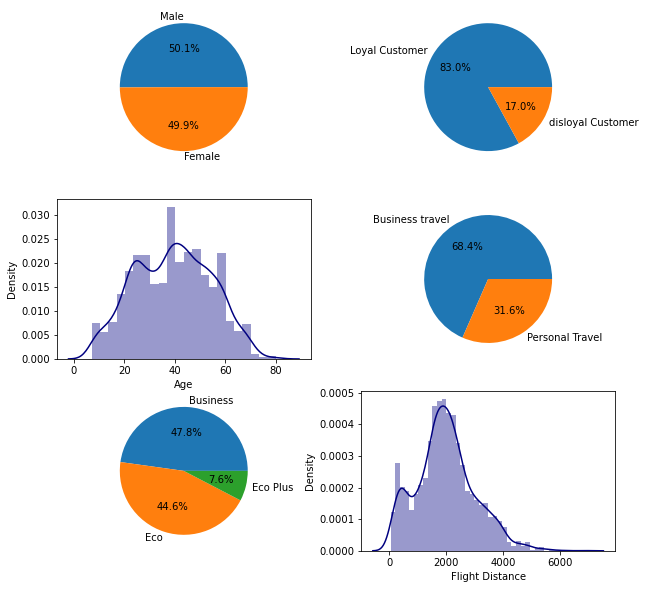

In [116]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
gender=train['Gender'].value_counts()
plt.pie(gender,autopct="%.1f%%",labels=[gender.index[0],gender.index[1]])

plt.subplot(3,2,2)
custype=train['Customer Type'].value_counts()
plt.pie(custype,autopct="%.1f%%",labels=[custype.index[0],custype.index[1]])

plt.subplot(3,2,3)
sns.distplot(train['Age'],color='navy')

plt.subplot(3,2,4)
tot=train['Type of Travel'].value_counts()
plt.pie(tot,autopct="%.1f%%",labels=[tot.index[0],tot.index[1]])

plt.subplot(3,2,5)
cl=train['Class'].value_counts()
plt.pie(cl,autopct="%.1f%%",labels=[cl.index[0],cl.index[1],cl.index[2]])

plt.subplot(3,2,6)
sns.distplot(train['Flight Distance'],color='navy')

In [96]:
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

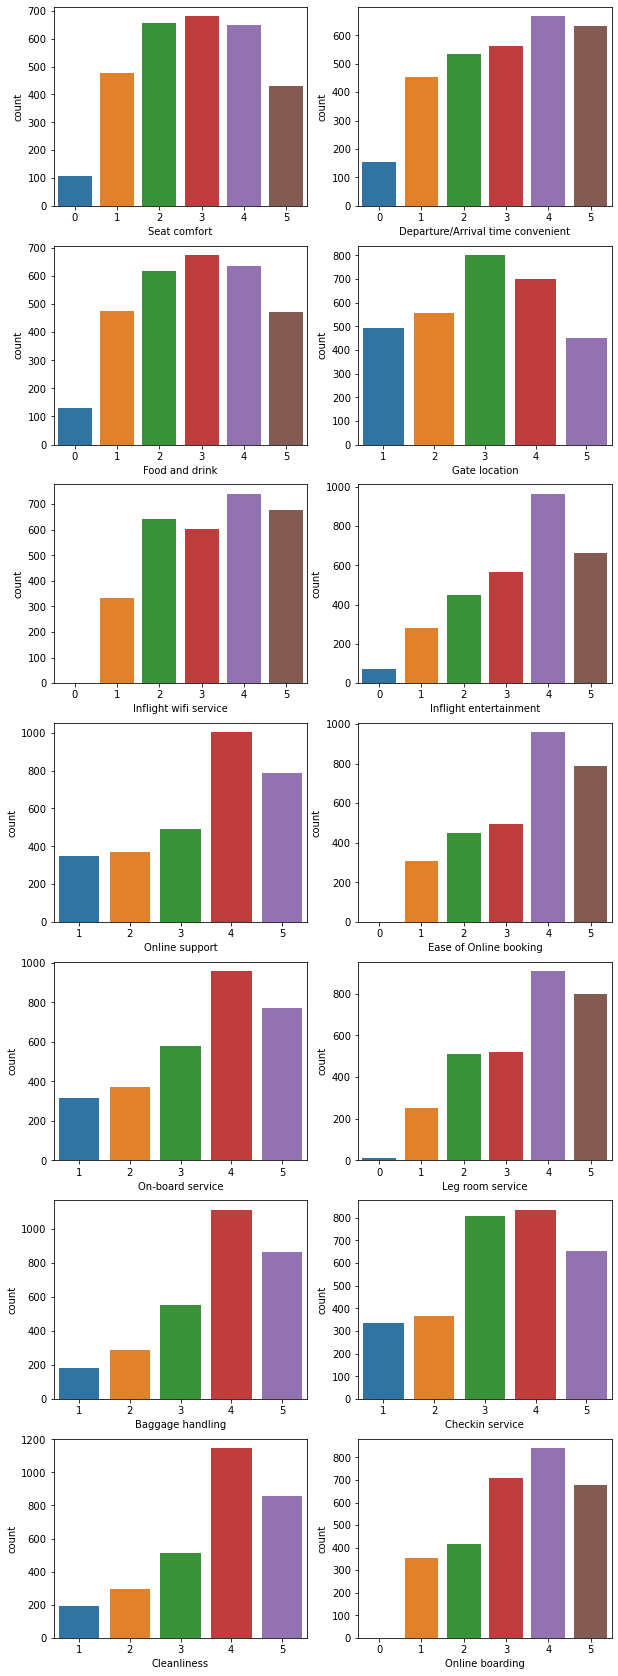

In [115]:
column=['Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding']
plt.figure(figsize=(10,30))
for i in range(0,len(column)):
    plt.subplot(7,2,i+1)
    sns.countplot(train[column[i]])

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

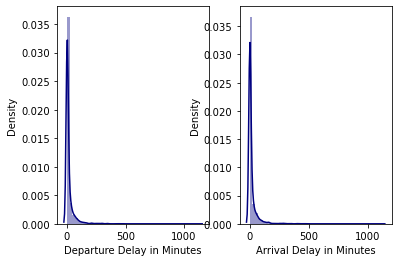

In [117]:
plt.subplot(1,2,1)
sns.distplot(train['Departure Delay in Minutes'],color='navy')

plt.subplot(1,2,2)
sns.distplot(train['Arrival Delay in Minutes'],color='navy')

Outlier가 존재한다.

In [120]:
train[train['Departure Delay in Minutes']>500]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
1842,1843,Female,disloyal Customer,39,Business travel,Eco,2431,3,3,3,3,3,4,4,5,3,1,5,4,1,4,652,638.0,0
2349,2350,Male,Loyal Customer,8,Personal Travel,Eco,3017,2,5,2,2,2,1,1,4,4,3,5,1,3,1,1128,1115.0,0


drop 하기로 결정

In [122]:
train.drop([1842,2349],inplace=True)

우선 성별 비율과 성별에 따른 다른 column 비율을 알아본다.

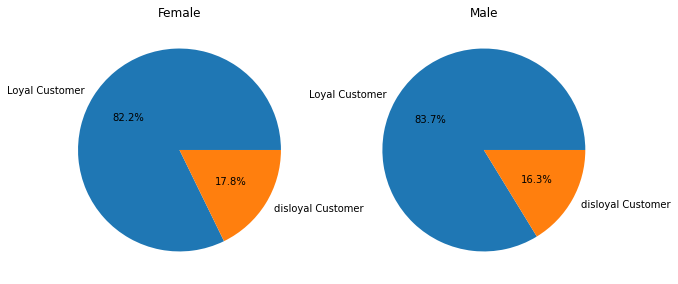

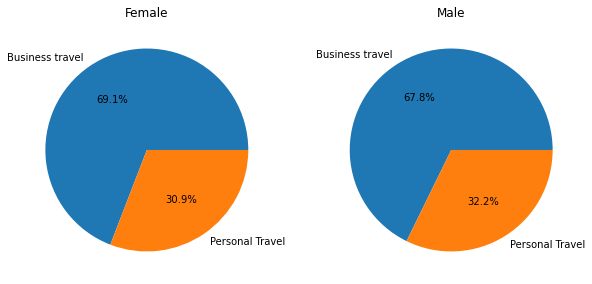

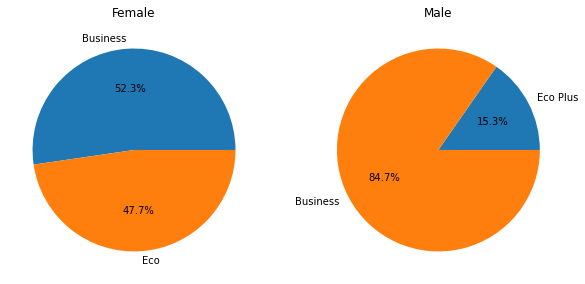

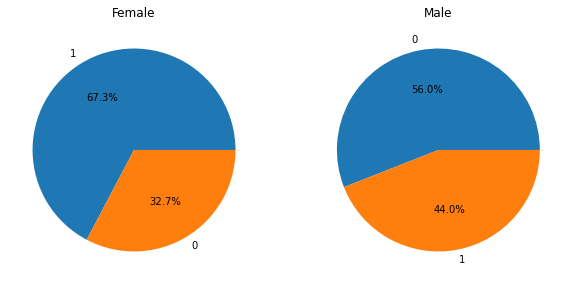

In [123]:
gender_eda=['Customer Type','Type of Travel','Class','target']
for i in range(0,4):
    gender_1=train.groupby('Gender')[gender_eda[i]].value_counts()

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Female")
    plt.pie([gender_1[0],gender_1[1]],autopct='%.1f%%',labels=[gender_1.index[0][1],gender_1.index[1][1]])
    plt.subplot(1,2,2)
    plt.title("Male")
    plt.pie([gender_1[2],gender_1[3]],autopct='%.1f%%',labels=[gender_1.index[2][1],gender_1.index[3][1]])

Customer Type과 Type of Travel에서는 남녀 성비가 큰 차이가 없으나,<br>
Class와 Target에서는 차이가 존재한다.

([<matplotlib.patches.Wedge at 0x233c216de50>,
 [Text(-0.9466167122089795, 0.5602827858917873, 'Loyal Customer'),
  Text(0.9466167646664353, -0.5602826972631325, 'disloyal Customer')],
 [Text(-0.5163363884776251, 0.3056087923046112, '83.0%'),
  Text(0.5163364170907828, -0.3056087439617086, '17.0%')])

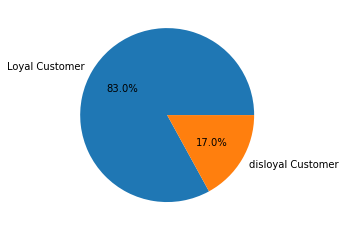

In [124]:
CT=train['Customer Type'].value_counts()

plt.pie(CT,autopct="%.1f%%",labels=[CT.index[0],CT.index[1]])

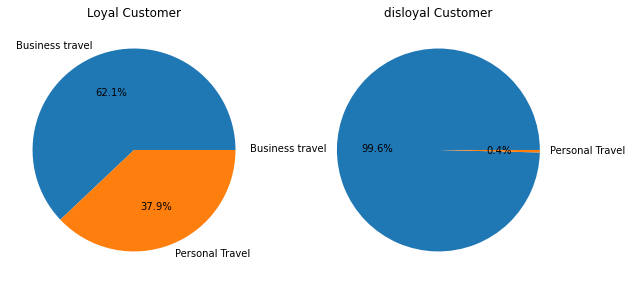

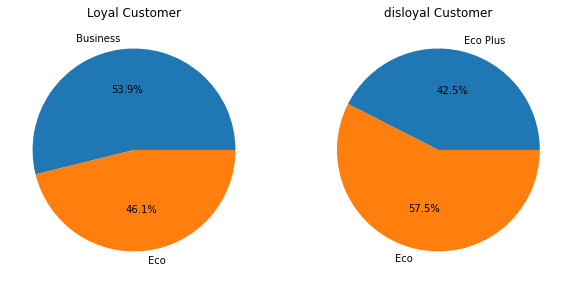

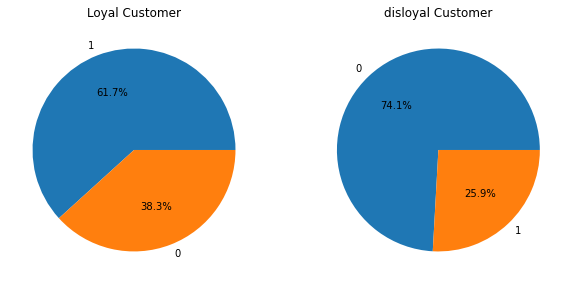

In [125]:
ct=['Type of Travel','Class','target']
for i in range(0,3):
    ct_1=train.groupby('Customer Type')[ct[i]].value_counts()

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Loyal Customer")
    plt.pie([ct_1[0],ct_1[1]],autopct='%.1f%%',labels=[ct_1.index[0][1],ct_1.index[1][1]])
    plt.subplot(1,2,2)
    plt.title("disloyal Customer")
    plt.pie([ct_1[2],ct_1[3]],autopct='%.1f%%',labels=[ct_1.index[2][1],ct_1.index[3][1]])

Customer Type에서도 Loyal Customer와 disloyal Customer 사이에서 비율 차이가 드러난다.

Pearson correlation을 알아보기 위해 object로 되어있는 column을 encoding 해주자.

In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
le=LabelEncoder()

In [128]:
columns=['Gender','Customer Type','Type of Travel','Class']
for i in columns:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

<AxesSubplot:>

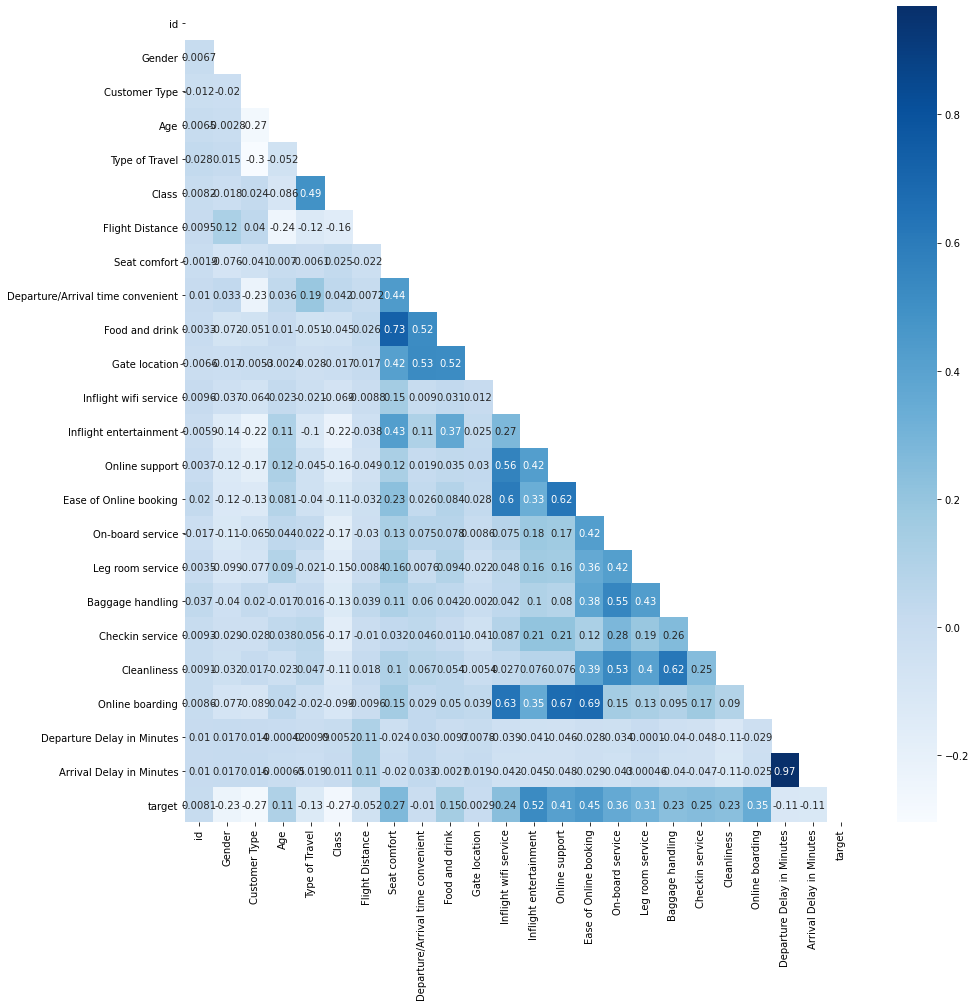

In [129]:
mask=np.zeros_like(train.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),cmap='Blues',annot=True,mask=mask)

이 중에서 절댓값 0.4이상의 강한 상관관계를 갖는 것만 추려낸다.<br>
Arrival Delay in Minutes와 Departure Delay in Minutes는 강한 상관관계를 갖고 있으므로 통합한다.

In [130]:
corr=[]
for i in train.columns:
    for j in train.columns:
        if (train.corr()[i][j]>0.4) & (train.corr()[i][j] <1):
            corr.append([i,j])
        if (train.corr()[i][j]<-0.4):
            corr.append([i,j])

In [131]:
corr

[['Type of Travel', 'Class'],
 ['Class', 'Type of Travel'],
 ['Seat comfort', 'Departure/Arrival time convenient'],
 ['Seat comfort', 'Food and drink'],
 ['Seat comfort', 'Gate location'],
 ['Seat comfort', 'Inflight entertainment'],
 ['Departure/Arrival time convenient', 'Seat comfort'],
 ['Departure/Arrival time convenient', 'Food and drink'],
 ['Departure/Arrival time convenient', 'Gate location'],
 ['Food and drink', 'Seat comfort'],
 ['Food and drink', 'Departure/Arrival time convenient'],
 ['Food and drink', 'Gate location'],
 ['Gate location', 'Seat comfort'],
 ['Gate location', 'Departure/Arrival time convenient'],
 ['Gate location', 'Food and drink'],
 ['Inflight wifi service', 'Online support'],
 ['Inflight wifi service', 'Ease of Online booking'],
 ['Inflight wifi service', 'Online boarding'],
 ['Inflight entertainment', 'Seat comfort'],
 ['Inflight entertainment', 'Online support'],
 ['Inflight entertainment', 'target'],
 ['Online support', 'Inflight wifi service'],
 ['Onli

In [132]:
train['Average Delay']=(train['Arrival Delay in Minutes']+train['Departure Delay in Minutes'])/2
test['Average Delay']=(test['Arrival Delay in Minutes']+test['Departure Delay in Minutes'])/2

In [133]:
train.drop(['Arrival Delay in Minutes','Departure Delay in Minutes'],axis=1,inplace=True)
test.drop(['Arrival Delay in Minutes','Departure Delay in Minutes'],axis=1,inplace=True)

In [134]:
train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,target,Average Delay
0,1,0,1,22,0,1,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0
1,2,0,0,37,0,0,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,0,18.0
2,3,1,0,46,0,0,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,1,0.0
3,4,0,1,24,0,1,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,0,6.0
4,5,0,0,58,0,0,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,1,0,30,1,1,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,0,218.0
2996,2997,0,1,24,0,1,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,0,16.5
2997,2998,0,1,22,0,1,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,0,65.5
2998,2999,0,1,33,0,0,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,1.5


<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='Average Delay'>

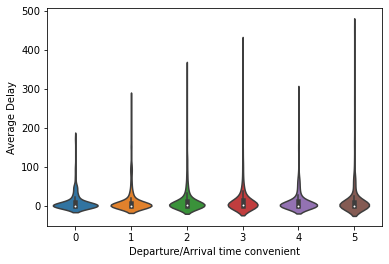

In [135]:
sns.violinplot(train['Departure/Arrival time convenient'],train['Average Delay'])